# Import Libraries 

Import all the required Tensorflow and Keras libraries

In [1]:
# These are all the imports we will need.  You shouldn't need anything else.


from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras import regularizers
import os as os
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline

Using TensorFlow backend.


 # Step 1: Design the CNN architecture. After designing the architecture, print it in iPython Notebook. 


In [2]:
# WRITE THE CODE DEFINING THE NETWORK ARCHITECTURE HERE (Sec. 2.2 in the assignment PDF)

# Initialize a CNN model object using the Sequential() function from keras.models
model = Sequential()

# Add a convolution layer with 32 feature maps of shape (3,3), and input_shape=(64,64,3).
# Use 'relu' for the activation function.

#number of feature maps = 32
#map dimension = (3,3)
#input shape = (64,64,3) 64x64 image
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation="relu"))

# Add a max pooling layer, with a pool_size of (2,2)
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a three more pairs of convolution and max pooling layers with the same
# parameters as above.  Don't specify input_shape for the convolutional layer this time
# since it can be inferred from the previous layer.

model.add(Conv2D(32, (3,3), activation = "relu") )
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation = "relu") )
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation = "relu") )
model.add(MaxPooling2D(pool_size = (2,2)))


# Add a flattening layer.

model.add(Flatten ())

# Add a fully connected layer with 128 units and the RELU activation function. This
# will be a hidden layer.  Use the L2 kernel regularizer.

model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
# Add a fully connected layer with 1 unit and the sigmoid activation function.  This
# will be the output layer.


# Compile the CNN using the compile() method.  Use the 'adam' optimizer, and the 
# 'binary_crossentropy' loss function.  Use the parameter metrics=['accuracy'].  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
#Print a Summary of the Architecture by calling the summary() method of the model object.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          9248      
__________

# Step 2: Load Images and Prepare the Network for training

In [5]:
#Train and Test ImageDataGenerator code

# Here is the training dataset generator.  It uses real-time data augmentation allowing horizontal flips, 
# and a modest amount of zooming and shearing.
train_datagen = image.ImageDataGenerator(rescale=1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Here is the validation dataset generator.  It doesn't need any data augmentation.
validation_datagen = image.ImageDataGenerator(rescale = 1./255)


# Load the training set using train_datagen.flow_from_directory().  Use
# target_size = (32,32), batch_size=32, and class_mode = 'binary'.
#target size (32,32) or (64,64) like the assignment says
training_set = train_datagen.flow_from_directory('./dataset_jpg_square/train',target_size=(128,128), batch_size=32, class_mode='binary')

# Load the validation dataset using validation_datagen.flow_from_directory(). 
# Use the same parameters as above.
validation_set = validation_datagen.flow_from_directory('./dataset_jpg_square/valid',target_size=(128,128), batch_size=32, class_mode='binary')


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Step 3: Run the CNN Network

In [6]:
# Train the CNN using the fit_generator() function of your CNN.  
# Use steps_per_epoch=718, epochs=40, validation_data=validation_set,
# and validation_steps=63, and verbose=1.
#
# We use steps_per_epoch = 718 because we have 23000 training images and a batch size of 32.
# To ensure we run through the entire training set in one epoch, we need to run 23000/32 = 718 
# different batches.
#
# We use validation_steps = 63 because we have 2000 validation images and again a batch size of 32,
# so to ensure that we run through the entire validation set at the end of each epoch we need
# to run 2000/32 = 63 batches.  
# 

# You should see the loss function and the accuracy improving quite a bit after each of the 
# first few epochs.  Then it should slow down.  If you allow it to run for more than 40 epochs 
# you probably won't see much additional improvement (for me, after 55 epochs it was no better 
# than it was after 40 epochs).

# Expect a long pause at the end of each epoch as it classifies images from the validation set.
# You'll find that the validation accuracy does not improve much.  You should be able to get better 
# results by using larger (128x128) or (256,256) images instead of scaling down to 64x64, 
# but this takes vastly more time.  You can try if you have time.

# This will take a while - maybe 2-3 hours.  On my computer (which is a pretty new
# macbook pro) it took about 250 seconds per epoch. 

#steps per epoch is 32 or 718
history = model.fit_generator(training_set, steps_per_epoch=718, epochs=40, validation_data = validation_set, validation_steps=63, verbose=1)

Epoch 1/40
718/718 [==============================] - 419s 583ms/step - loss: 0.7705 - acc: 0.5457 - val_loss: 0.6717 - val_acc: 0.5790
Epoch 2/40
718/718 [==============================] - 434s 605ms/step - loss: 0.6216 - acc: 0.6617 - val_loss: 0.5613 - val_acc: 0.7245
Epoch 3/40
718/718 [==============================] - 468s 652ms/step - loss: 0.5652 - acc: 0.7146 - val_loss: 0.5350 - val_acc: 0.7325
Epoch 4/40
718/718 [==============================] - 377s 525ms/step - loss: 0.5101 - acc: 0.7574 - val_loss: 0.4929 - val_acc: 0.7715
Epoch 5/40
718/718 [==============================] - 363s 506ms/step - loss: 0.4768 - acc: 0.7796 - val_loss: 0.4444 - val_acc: 0.7880
Epoch 6/40
718/718 [==============================] - 362s 504ms/step - loss: 0.4500 - acc: 0.7958 - val_loss: 0.4165 - val_acc: 0.8125
Epoch 7/40
718/718 [==============================] - 363s 505ms/step - loss: 0.4264 - acc: 0.8097 - val_loss: 0.4044 - val_acc: 0.8160
Epoch 8/40
718/718 [============================

# Step 4: Save the model and weights for prediction

In [8]:
# Save the model using the save() method of the CNN model.

model.save('Cat-Dog-64x64-3layer-maxpooling.h5')
print("Saved model to disk")

Saved model to disk


# Step 5: Plot the training and Validation Loss/Accuracy

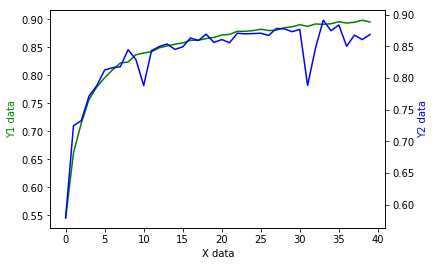

[]

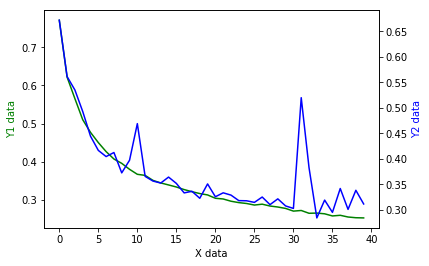

In [9]:
# Get the history of the training and validation accuracy and loss 
# from the history object returned by model.fit_generator().  Plot
# two graphs as described in the assignment PDF.  
#
# e.g. history.history['acc'] is an array of the training accuracy for each epoch.

y1 = history.history['acc']
y2 = history.history['val_acc']
y3 = history.history['loss']
y4 = history.history['val_loss']
x = range(0, len(y1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y3, 'g-')
ax2.plot(x, y4, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.plot()

# Step 6: Predict Dog/Cat using the Trained Model

In [11]:
# Write your code to test the model here.

# Start by loading your model from disk that you previously saved so you don't have to run through
# the rest of the notebook just to test the model.  Use the load_model() function (already imported 
# above from keras.models).

model=load_model('Cat-Dog-64x64-3layer-maxpooling.h5')
#test_image=image.load_img('dataset_jpg_square/test1/cats/12097.jpg', target_size=(64,64))
#test_image=image.img_to_array(test_image)
#test_image=np.expand_dims(test_image, axis=0)
#result=model.predict(test_image)
#if (result[0][0] < 0.5):
#    print(0)
#else:
#    print(1)


# Now load each of the test images and get a prediction (you'll know the ground truth because
# you'll know which folder (cats or dogs) each image comes from.  Determine the correct classification
# rate and print it out.  

correct = 0
wrong = 0
images = [os.path.basename(x) for x in glob.glob('cats/*.jpg')]
length = len(images)
for i in range(0,length):
    pic = 'cats/' + images[i]
    #print("i:", i, "images[i]:", images[i], "pic: ", pic)
    test_image=image.load_img(pic, target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    if (result[0][0] < 0.5):
        correct=correct+1
    else:
        wrong=wrong+1
        
images = [os.path.basename(x) for x in glob.glob('dogs/*.jpg')]
length = len(images)
for i in range(0,length):
    pic = 'dogs/' + images[i]
    test_image=image.load_img(pic, target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    if (result[0][0] > 0.5):
        correct=correct+1
    else:
        wrong=wrong+1
        
print(correct/(correct + wrong))

0.8837209302325582
